# Sentiment Analysis using Lexicon-based approach

In [1]:
import pandas as pd

df = pd.read_csv(r'EcoPreprocessed.csv')
df.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [2]:
df.isna().sum()

Unnamed: 0    0
review        0
polarity      0
division      0
dtype: int64

# Sentimental analysis
## Analysis with Bing liu lexicon

In [3]:
from sklearn import preprocessing
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

pos_score = 1
neg_score = -1
word_dict = {}
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
    word_dict[word] = neg_score
    
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

def score_division(scores):
    sentiment = ['positive' if score > 0
                              else 'negative' if score < 0
                                  else 'neutral'
                                      for score in scores]
    return sentiment

df['Bing_Liu_Score'] = df['review'].apply(bing_liu_score)
df['Bing_Liu_division'] = score_division(df['Bing_Liu_Score'])

df.head()

,Unnamed: 0,review,polarity,division,Bing_Liu_Score,Bing_Liu_division
0,3870,able play youtube alexa,0.5000,positive,0,neutral
1,62,able recognize indian accent really well drop ...,0.2794,positive,5,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive,4,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive,1,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive,1,positive


## Analysis with afinn lexicon

In [4]:
from afinn import Afinn

afn = Afinn()
scores = [afn.score(article) for article in df['review']]

     
# dataframe creation
df['afinn_score'] = scores
df['afinn_division'] = score_division(df['afinn_score'])
df.head()

,Unnamed: 0,review,polarity,division,Bing_Liu_Score,Bing_Liu_division,afinn_score,afinn_division
0,3870,able play youtube alexa,0.5000,positive,0,neutral,0.0,neutral
1,62,able recognize indian accent really well drop ...,0.2794,positive,5,positive,6.0,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive,4,positive,7.0,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive,1,positive,2.0,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive,1,positive,2.0,positive


In [10]:
df['afinn_acc'] = df['division'] == df['afinn_division']
df['Bing_Liu_acc'] = df['division'] == df['Bing_Liu_division']
df.head()

,Unnamed: 0,review,polarity,division,Bing_Liu_Score,Bing_Liu_division,afinn_score,afinn_division,afinn_acc,Bing_Liu_acc
0,3870,able play youtube alexa,0.5000,positive,0,neutral,0.0,neutral,False,False
1,62,able recognize indian accent really well drop ...,0.2794,positive,5,positive,6.0,positive,True,True
2,487,absolute smart device amazon connect external ...,0.1827,positive,4,positive,7.0,positive,True,True
3,3204,absolutely amaze new member family control hom...,0.3682,positive,1,positive,2.0,positive,True,True
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive,1,positive,2.0,positive,True,True


# Comparision
## original division

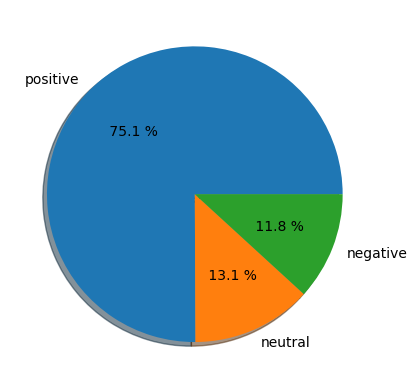

In [22]:
import matplotlib.pyplot as plt

plt.pie(df['division'].value_counts(), labels = {'positive', 'neutral', 'negative'},
                             
autopct ='% 1.1f %%', shadow = True) 
plt.show() 

## Bing Liu division

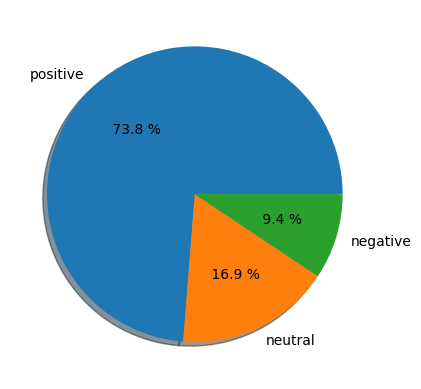

In [23]:
plt.pie(df['Bing_Liu_division'].value_counts(), labels = {'positive', 'neutral', 'negative'},
                             
autopct ='% 1.1f %%', shadow = True) 
plt.show() 

## afinn division

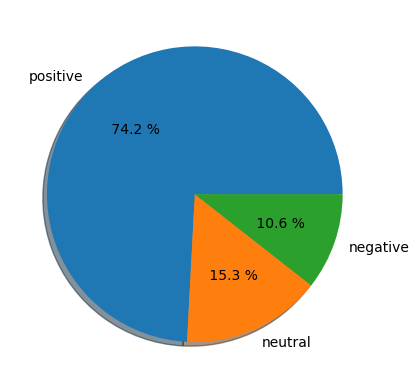

In [24]:
plt.pie(df['afinn_division'].value_counts(), labels = {'positive', 'neutral', 'negative'},
                             
autopct ='% 1.1f %%', shadow = True) 
plt.show() 

In [26]:
df['afinn_acc'].value_counts()[0]

3393

In [31]:
def acc_calculator(scores):
    return scores[0] / (scores[0] + scores[1])

afinn_acc = acc_calculator(df['afinn_acc'].value_counts())
Bing_Liu_acc = acc_calculator(df['Bing_Liu_acc'].value_counts())

print(f'afinn accuracy :{afinn_acc}')
print(f'Bing Liu accuracy :{Bing_Liu_acc}')

afinn accuracy :0.8308031341821743
Bing Liu accuracy :0.7982370225269344


After comparing both afinn analysis and bing liu analysis with actual data the results show that afinn shows high accurate results. It is concluded that afinn is best algorithm for sentimental analysis,